In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install pmdarima matplotlib scikit-learn numpy

Note: you may need to restart the kernel to use updated packages.


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=11.99 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=31309.171, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=31313.137, Time=1.50 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=31313.153, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=35181.477, Time=0.03 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=31311.161, Time=0.95 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=31311.110, Time=0.60 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=31313.108, Time=4.27 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=31311.165, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=31311.213, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=31313.192, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 20.865 seconds


C:\Users\behxi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\behxi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


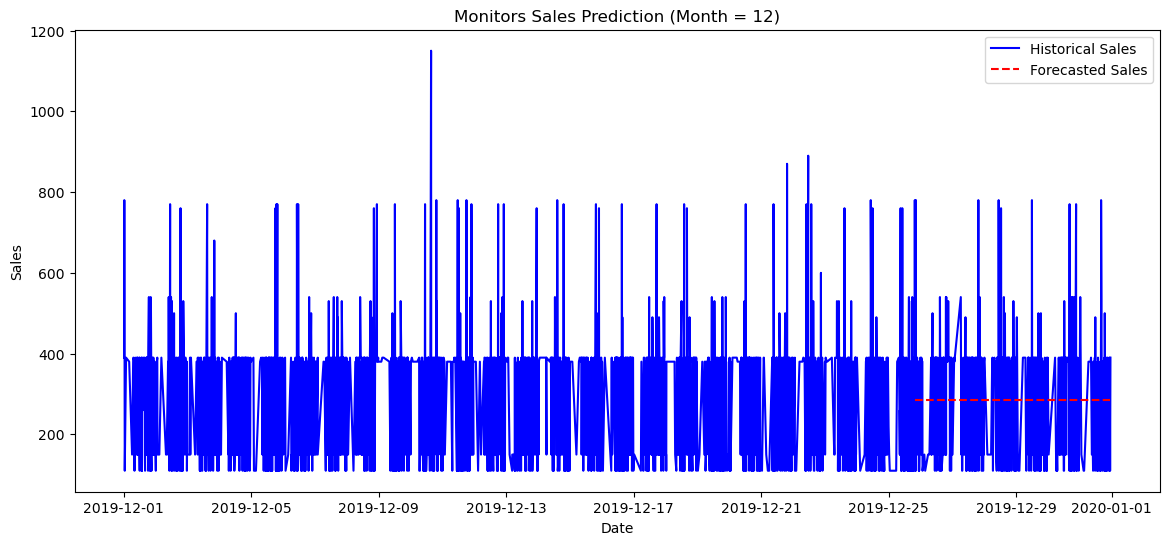

RMSE: 144.80493876315643
R-squared: -0.002872119785962468


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("data/Sales Data.csv")

# Filter for Monitors data and month = 12, creating a copy to avoid the SettingWithCopyWarning
monitors_data = data[data['Product Category'] == 'Monitors'].copy()

# Convert the 'Order Date' to datetime format
monitors_data['Order Date'] = pd.to_datetime(monitors_data['Order Date'], format='%d-%m-%Y %H:%M')

# Filter data for Month 12
monitors_data = monitors_data[monitors_data['Month'] == 12]

# Group by Order Date to get sales per day
sales_data = monitors_data.groupby('Order Date')['Sales'].sum()

# Ensure 'Order Date' is the index and set it to datetime
sales_data = sales_data.sort_index()
sales_data.index = pd.to_datetime(sales_data.index)

# Split into train and test sets (train is 80%, test is 20%)
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]

# Fit the AutoARIMA model
model = auto_arima(train, seasonal=True, m=12, stepwise=True, trace=True)

# Predict using the model
forecast = model.predict(n_periods=len(test))

# Create a forecast index (same as the test data index)
forecast_index = test.index

# Calculate RMSE and R-squared
rmse = np.sqrt(mean_squared_error(test, forecast))
r_squared = r2_score(test, forecast)

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(sales_data.index, sales_data, label='Historical Sales', color='blue')
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monitors Sales Prediction (Month = 12)')
plt.legend()
plt.show()

# Display RMSE and R-squared
print(f'RMSE: {rmse}')
print(f'R-squared: {r_squared}')
